In [64]:
import pandas as pd

In [65]:
df = pd.read_csv("95012IncludingCVEs_20230326.csv")

In [66]:
df.head()

,created_at,id,text,author_id,edit_history_tweet_ids,public_metrics,CVE
0,2023-02-06T15:00:04.000Z,1622611085894328322,Docker Full Privilege Escalation (#CVE-2022-25...,4.365682e+08,['1622611085894328322'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2022-25365
1,2023-02-06T15:00:35.000Z,1622611217725399042,RT @0xor0ne: CVE-2021-27365: analysis and expl...,1.949128e+07,['1622611217725399042'],"{'retweet_count': 107, 'reply_count': 0, 'like...",CVE-2021-27365
2,2023-02-06T15:01:32.000Z,1622611455823732736,CVE-2021-21974 https://t.co/OqV4Ki8gRI #Harsia...,1.083501e+18,['1622611455823732736'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2021-21974
3,2023-02-06T15:02:17.000Z,1622611643040423939,RT @SecurityBDog: Is CVE-2022-42889 important ...,1.359569e+18,['1622611643040423939'],"{'retweet_count': 2, 'reply_count': 0, 'like_c...",CVE-2022-42889
4,2023-02-06T15:02:32.000Z,1622611709390389248,CVE-2017-2997 https://t.co/lC3cUVrBN9 #HarsiaInfo,1.083501e+18,['1622611709390389248'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2017-2997


In [67]:
len(df)

95012

In [68]:
df_CVEs = df[["author_id","CVE"]].groupby(["CVE"])["author_id"]\
                                          .nunique()\
                                          .reset_index(name = 'num_of_author')\
                                          .sort_values(['num_of_author'],ascending = False)
df_CVEs.head()

,CVE,num_of_author
9508,CVE-2023-23397,3202
6285,CVE-2022-39952,1160
9024,CVE-2023-21716,883
9039,CVE-2023-21768,647
9653,CVE-2023-23752,612


In [69]:
df_CVEs_10p = df_CVEs[df_CVEs["num_of_author"] >= 10]
df_CVEs_10p.head()

,CVE,num_of_author
9508,CVE-2023-23397,3202
6285,CVE-2022-39952,1160
9024,CVE-2023-21716,883
9039,CVE-2023-21768,647
9653,CVE-2023-23752,612


In [70]:
df_CVEs_10p.tail()

,CVE,num_of_author
9816,CVE-2023-24160,10
9851,CVE-2023-24232,10
10690,CVE-2023-27235,10
10683,CVE-2023-27210,10
9852,CVE-2023-24233,10


In [71]:
print(df["CVE"].nunique())

11044


In [72]:
len(df_CVEs_10p)

1724

In [73]:
len(df_CVEs)

11044

<AxesSubplot: xlabel='CVE'>

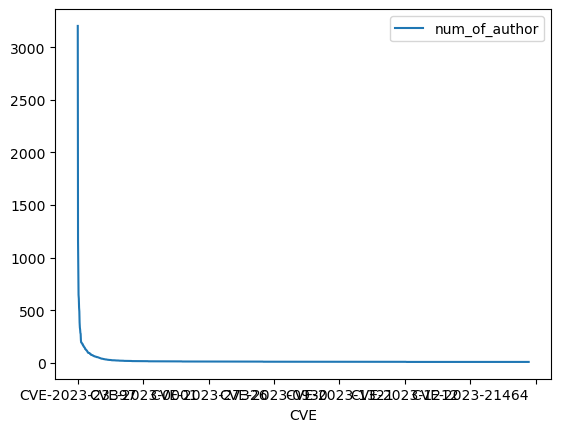

In [74]:
import matplotlib.pyplot as plt
import numpy as np
# x = np.array(df_CVEs_10p["CVE"])
# y = np.array(df_CVEs_10p["num_of_author"])
df_CVEs_10p.plot(x="CVE")

In [ ]:
list_CVEs_10p = df_CVEs_10p["CVE"].tolist()
print(list_CVEs_10p[:10])
len(list_CVEs_10p)

In [76]:
df_10p= df[df["CVE"].isin(list_CVEs_10p)]
df_10p.head()

,created_at,id,text,author_id,edit_history_tweet_ids,public_metrics,CVE
1,2023-02-06T15:00:35.000Z,1622611217725399042,RT @0xor0ne: CVE-2021-27365: analysis and expl...,1.949128e+07,['1622611217725399042'],"{'retweet_count': 107, 'reply_count': 0, 'like...",CVE-2021-27365
2,2023-02-06T15:01:32.000Z,1622611455823732736,CVE-2021-21974 https://t.co/OqV4Ki8gRI #Harsia...,1.083501e+18,['1622611455823732736'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2021-21974
3,2023-02-06T15:02:17.000Z,1622611643040423939,RT @SecurityBDog: Is CVE-2022-42889 important ...,1.359569e+18,['1622611643040423939'],"{'retweet_count': 2, 'reply_count': 0, 'like_c...",CVE-2022-42889
5,2023-02-06T15:02:36.000Z,1622611724770877443,RT @0xor0ne: CVE-2022-47949: analysis and expl...,1.621510e+18,['1622611724770877443'],"{'retweet_count': 71, 'reply_count': 0, 'like_...",CVE-2022-47949
6,2023-02-06T15:03:33.000Z,1622611963275780096,CVE-2022-44268 https://t.co/JWNV88HSaa #Harsia...,1.083501e+18,['1622611963275780096'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2022-44268


In [77]:
df_10p.tail()

,created_at,id,text,author_id,edit_history_tweet_ids,public_metrics,CVE
95005,2023-03-26 14:55:04+00:00,1640004446057840646,RT @threatmeter: CVE-2021-42761 | Fortinet For...,1.900976e+08,[1640004446057840646],"{'retweet_count': 14, 'reply_count': 0, 'like_...",CVE-2021-42761
95007,2023-03-26 14:56:54+00:00,1640004907666231296,"ثغرة حديثة ""CVE-2022-3229""\n #منيع https://t.c...",1.633455e+18,[1640004907666231296],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2022-3229
95008,2023-03-26 14:56:55+00:00,1640004909969063939,🚨 NEW: CVE-2023-1445 🚨 A vulnerability classif...,9.041290e+17,[1640004909969063939],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2023-1445
95010,2023-03-26 14:58:45+00:00,1640005374831984641,RT @CVEnew: CVE-2023-1105 External Control of ...,1.493214e+18,[1640005374831984641],"{'retweet_count': 1, 'reply_count': 0, 'like_c...",CVE-2023-1105
95011,2023-03-26 14:59:10+00:00,1640005479223967746,"ثغرة حديثة ""CVE-2022-46496""\n #منيع https://t....",1.633455e+18,[1640005479223967746],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2022-46496


In [78]:
len(df_10p)

52885

In [84]:
# https://qiita.com/usop4/items/70b7db1acbd54112c428
import urllib.request
from bs4 import BeautifulSoup

cve_list = df_10p["CVE"].tolist()

print(cve_list[:10])

['CVE-2021-27365', 'CVE-2021-21974', 'CVE-2022-42889', 'CVE-2022-47949', 'CVE-2022-44268', 'CVE-2022-48019', 'CVE-2023-24191', 'CVE-2023-24192', 'CVE-2023-24194', 'CVE-2021-21974']


In [89]:
from time import sleep
import logging

# https://www.true-fly.com/entry/2022/03/02/073000
# 処理時間を計測するため、loggerのフォーマット設定しています
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
format = '%(asctime)s [%(levelname)s] %(filename)s, lines %(lineno)d. %(message)s'
formatter = logging.Formatter(format, '%Y-%m-%d %H:%M:%S')
stream_handler = logging.StreamHandler()
stream_handler.setFormatter(formatter)
logger.addHandler(stream_handler)

for cve in cve_list[:10]:
    # リトライ間隔（秒）
    retry_interval = 2
    # 試行回数
    tries = 5
    
    for i in range(0, tries):
        try:
            instance = urllib.request.urlopen("https://nvd.nist.gov/vuln/detail/"+cve)
            break
            
        except Exception as e:
            if i + 1 == tries:
                raise e
            
            sleep(retry_interval)
            logger.info('リトライ回数:{}回目'.format(i + 1))
            continue
            
    soup = BeautifulSoup(instance, "html.parser")
    desc = soup.select_one("[data-testid=vuln-cvss3-panel-score]")
    if hasattr(desc, "text"):
        print(f"{cve}, {desc.text.strip()}")

CVE-2021-27365, 7.8 HIGH
CVE-2021-21974, 8.8 HIGH
CVE-2022-42889, 9.8 CRITICAL


2023-03-29 08:45:24 [INFO] 610071444.py, lines 30. リトライ回数:1回目
2023-03-29 08:45:24 [INFO] 610071444.py, lines 30. リトライ回数:1回目
2023-03-29 08:46:41 [INFO] 610071444.py, lines 30. リトライ回数:2回目
2023-03-29 08:46:41 [INFO] 610071444.py, lines 30. リトライ回数:2回目
2023-03-29 08:48:34 [INFO] 610071444.py, lines 30. リトライ回数:1回目
2023-03-29 08:48:34 [INFO] 610071444.py, lines 30. リトライ回数:1回目
2023-03-29 08:49:18 [INFO] 610071444.py, lines 30. リトライ回数:2回目
2023-03-29 08:49:18 [INFO] 610071444.py, lines 30. リトライ回数:2回目


CVE-2022-44268, 6.5 MEDIUM
CVE-2022-48019, 7.8 HIGH
CVE-2023-24191, 6.1 MEDIUM


2023-03-29 08:50:54 [INFO] 610071444.py, lines 30. リトライ回数:1回目
2023-03-29 08:50:54 [INFO] 610071444.py, lines 30. リトライ回数:1回目


CVE-2023-24192, 6.1 MEDIUM
CVE-2023-24194, 6.1 MEDIUM
CVE-2021-21974, 8.8 HIGH


In [129]:
import requests
import json

def get_cvss_level(cve_id):
    # Initialize
    cvssV3 = []

    # 入力したCVE番号に対応する脆弱性情報をNVDのAPIからJSON形式で取得して、cvssV3のbaseSeverity, baseScoreを返却する
    api = "https://services.nvd.nist.gov/rest/json/cves/2.0\?cveId="
    cve = cve_id
    uri = api + cve
    # print(uri)
    try:
        response = requests.get(uri)
    except Exception as e :
        raise e
    # print(response.text)
    json_data = json.loads(response.text)
    
    if json_data['vulnerabilities']:
        baseSeverity = json_data['vulnerabilities'][0]['cve']['metrics']['cvssMetricV31'][0]['cvssData']['baseSeverity']
        baseScore = json_data['vulnerabilities'][0]['cve']['metrics']['cvssMetricV31'][0]['cvssData']['baseScore']
        cvssV3 = [baseSeverity,baseScore]
    
    else:
        baseSeverity = None
        baseScore = None
        cvssV3 = [baseSeverity,baseScore]

    return(cvssV3)

get_cvss_level("CVE-2021-27365")    

['HIGH', 7.8]

In [130]:
for cve in cve_list[:3]:
    # API取得間隔（秒）
    # https://nvd.nist.gov/developers/start-here
    # "The public rate limit (without an API key) is 5 requests in a rolling 30 second window"
    interval = 6
    # リトライ間隔（秒）
    retry_interval = 6
    # 試行回数
    tries = 5
    
    for i in range(0, tries):
        try:
            cvss_level = get_cvss_level(cve)
            cvss_severity = cvss_level[0]
            cvss_score = cvss_level[1]
            sleep(interval)
            break
            
        except Exception as e:
            if i + 1 == tries:
                raise e
            
            sleep(retry_interval)
            logger.info('リトライ回数:{}回目'.format(i + 1))
            continue
    if cvss_level:
        print(f"{cve},{cvss_severity},{cvss_score}")

CVE-2021-27365,HIGH,7.8
CVE-2021-21974,HIGH,8.8
CVE-2022-42889,CRITICAL,9.8


In [131]:
cvss_severities = []
cvss_scores = []

for n, cve in enumerate(cve_list[:]):
    # API取得間隔（秒）
    # https://nvd.nist.gov/developers/start-here
    # "The public rate limit (without an API key) is 5 requests in a rolling 30 second window"
    interval = 6
    # リトライ間隔（秒）
    retry_interval = 6
    # 試行回数
    tries = 5
    
    cvss_level = []
    cvss_severity = None
    cvss_score = None
    
    print(n)
    
    for i in range(0, tries):
        try:
            cvss_level = get_cvss_level(cve)
            cvss_severity = cvss_level[0]
            cvss_score = cvss_level[1]
            sleep(interval)
            break
            
        except Exception as e:
            if i + 1 == tries:
                logger.info("取得失敗{}:{}個目".format(e,n))
            
            sleep(retry_interval)
            logger.info('リトライ回数:{}回目'.format(i + 1))
            continue
            
    if cvss_level:
        cvss_severities.append(cvss_severity)
        cvss_scores.append(cvss_score)
    else:
        cvss_severities.append(NaN)
        cvss_scores.append(NaN)
        

#print(cvss_severities)
#print(cvss_scores)

df_10p_cvss = df_10p
df_10p_cvss["baseSeverity"] = cvss_severities
df_10p_cvss["baseScore"] = cvss_scores
df_10p_cvss.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187


2023-03-30 07:26:22 [INFO] 460218602.py, lines 33. リトライ回数:1回目
2023-03-30 07:26:22 [INFO] 460218602.py, lines 33. リトライ回数:1回目
2023-03-30 07:26:30 [INFO] 460218602.py, lines 33. リトライ回数:2回目
2023-03-30 07:26:30 [INFO] 460218602.py, lines 33. リトライ回数:2回目
2023-03-30 07:26:37 [INFO] 460218602.py, lines 33. リトライ回数:3回目
2023-03-30 07:26:37 [INFO] 460218602.py, lines 33. リトライ回数:3回目
2023-03-30 07:26:44 [INFO] 460218602.py, lines 33. リトライ回数:4回目
2023-03-30 07:26:44 [INFO] 460218602.py, lines 33. リトライ回数:4回目
2023-03-30 07:26:45 [INFO] 460218602.py, lines 30. 取得失敗'cvssMetricV31':187個目
2023-03-30 07:26:45 [INFO] 460218602.py, lines 30. 取得失敗'cvssMetricV31':187個目
2023-03-30 07:26:51 [INFO] 460218602.py, lines 33. リトライ回数:5回目
2023-03-30 07:26:51 [INFO] 460218602.py, lines 33. リトライ回数:5回目


NameError: name 'NaN' is not defined

In [134]:
# https://qiita.com/f6wbl6/items/ddd4720a3014a89d922d
from operator import itemgetter
print(list(itemgetter(12,37,79,83,114)(list_CVEs_10p)))

['CVE-2023-0179', 'CVE-2023-0210', 'CVE-2023-20860', 'CVE-2017-9140', 'CVE-2022-36413']


In [135]:
import requests

for cve in list(itemgetter(12,37,79,83,114)(list_CVEs_10p)):

    params = {
        'cveId': cve,
    }
    response = requests.get('https://services.nvd.nist.gov/rest/json/cves/2.0', params=params)
    print(response.text)

{"resultsPerPage":1,"startIndex":0,"totalResults":1,"format":"NVD_CVE","version":"2.0","timestamp":"2023-03-30T08:06:43.380","vulnerabilities":[{"cve":{"id":"CVE-2023-0179","sourceIdentifier":"secalert@redhat.com","published":"2023-03-27T22:15:20.963","lastModified":"2023-03-28T10:12:01.767","vulnStatus":"Awaiting Analysis","descriptions":[{"lang":"en","value":"A buffer overflow vulnerability was found in the Netfilter subsystem in the Linux Kernel. This issue could allow the leakage of both stack and heap addresses, and potentially allow Local Privilege Escalation to the root user via arbitrary code execution."}],"metrics":{},"weaknesses":[{"source":"secalert@redhat.com","type":"Secondary","description":[{"lang":"en","value":"CWE-190"}]}],"references":[{"url":"https:\/\/bugzilla.redhat.com\/show_bug.cgi?id=2161713","source":"secalert@redhat.com"},{"url":"https:\/\/seclists.org\/oss-sec\/2023\/q1\/20","source":"secalert@redhat.com"}]}}]}
<html><body><h1>403 Forbidden</h1>
Request forbi

In [136]:
print(list(itemgetter(119,131,136,164,186,232,247)(list_CVEs_10p)))

['CVE-2022-23529', 'CVE-2016-10190', 'CVE-2018-5093', 'CVE-2015-2291', 'CVE-2017-0145', 'CVE-2023-0494', 'CVE-2023-1175']
